In [18]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

In [19]:
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 100
Batch_size = 128

In [20]:
train_dataset = pd.read_csv("/content/drive/MyDrive/FashionMNIST/fashion-mnist_train.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/FashionMNIST/fashion-mnist_test.csv")

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [22]:
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image, label

X, y = data_preprocessing(train_dataset)
X_test, y_test = data_preprocessing(test_dataset)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [24]:
# CNN Model
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [25]:
# model.summary()

In [26]:
# optimizer used = adam
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [27]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/100
352/352 [==============================] - 13s 10ms/step - loss: 0.6009 - accuracy: 0.7813 - val_loss: 0.4810 - val_accuracy: 0.8130
Epoch 2/100
352/352 [==============================] - 3s 10ms/step - loss: 0.4060 - accuracy: 0.8511 - val_loss: 0.3264 - val_accuracy: 0.8793
Epoch 3/100
352/352 [==============================] - 3s 10ms/step - loss: 0.3579 - accuracy: 0.8667 - val_loss: 0.3005 - val_accuracy: 0.8896
Epoch 4/100
352/352 [==============================] - 3s 9ms/step - loss: 0.3267 - accuracy: 0.8766 - val_loss: 0.3341 - val_accuracy: 0.8769
Epoch 5/100
352/352 [==============================] - 3s 9ms/step - loss: 0.3037 - accuracy: 0.8866 - val_loss: 0.2756 - val_accuracy: 0.8983
Epoch 6/100
352/352 [==============================] - 3s 9ms/step - loss: 0.2909 - accuracy: 0.8914 - val_loss: 0.2568 - val_accuracy: 0.9034
Epoch 7/100
352/352 [==============================] - 3s 9ms/step - loss: 0.2758 - accuracy: 0.8982 - val_loss: 0.2582 - val_accuracy: 0.

In [28]:
X_test.shape

(10000, 28, 28, 1)

# Salt and Pepper Noise

In [29]:
def salt_pepper(test_sequences,prob,salt=0,pepper=1):
  sampled_images = test_sequences
  for i in range(10000):
    for y in range(28):
      for x in range(28):
        r = np.random.random() 
        if r < prob:
          sampled_images[i][y][x] = salt
        elif r > 1-prob:
          sampled_images[i][y][x] = pepper
  return sampled_images

In [30]:
for i in range(1,6,1):
  noise = salt_pepper(X_test, i/100)

In [31]:
noise__ = noise.reshape(X_test.shape[0], 28, 28)

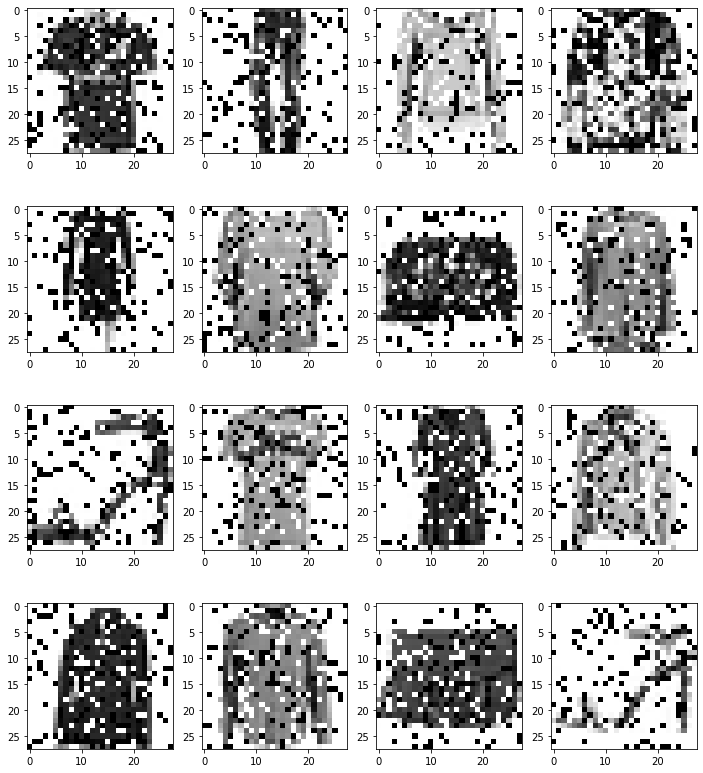

In [32]:
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(noise__[i], cmap='binary')

In [33]:
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 8.5315 - accuracy: 0.1658
Test loss: 8.531502723693848
Test accuracy: 0.16580000519752502


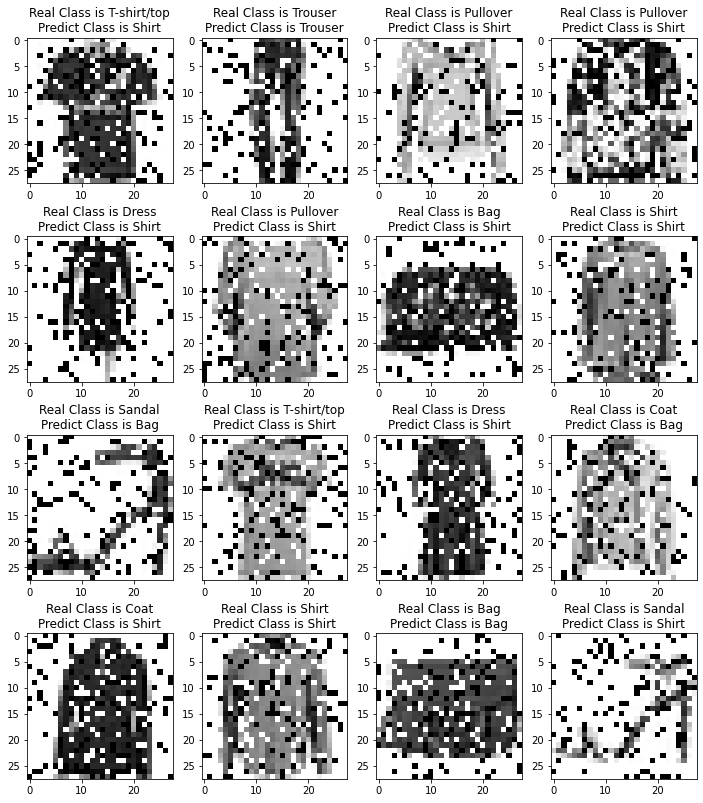

In [34]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_test[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}");